In [1]:
import pandas as pd

In [2]:
zigzag=pd.read_excel('지그재그.xlsx', header= 0)

In [3]:
ably = pd.read_excel('에이블리.xlsx', header= 0)

In [4]:
zigzag= zigzag.dropna()

In [5]:
ably = ably.dropna()

In [6]:
ably.columns = ['쇼핑몰', '태그1', '태그2']
zigzag.columns = ['쇼핑몰', '태그1', '태그2']

In [7]:
shopping_all=pd.concat([zigzag, ably])

In [8]:
shopping_all=shopping_all.reset_index().drop('index', axis=1)

In [9]:
shopping_all

,쇼핑몰,태그1,태그2
0,육육걸즈,심플베이직,러블리
1,핫핑,심플베이직,러블리
2,아뜨랑스,캠퍼스룩,오피스룩
3,고고싱,심플베이직,러블리
4,슬로우앤드,캠퍼스룩,심플베이직
...,...,...,...
391,워너비몰,페미닌,심플베이직
392,지니네,캐주얼,러블리
393,라라런드리,캐주얼,페미닌
394,더핑크,러블리,심플베이직


In [72]:
shopping_all.loc[shopping_all['태그2']=='오피스룩 ', '태그2'] = '오피스룩'

In [73]:
df_1=shopping_all[['쇼핑몰','태그1']].rename(columns={'태그1':'태그'})
df_2=shopping_all[['쇼핑몰','태그2']].rename(columns={'태그2':'태그'})
shopping_data=pd.concat([df_1,df_2])
#data[data['쇼핑몰']=='크림치즈마켓']
print(len(shopping_data))
shopping_data=shopping_data.sort_index()
shopping_data

792


,쇼핑몰,태그
0,육육걸즈,심플베이직
0,육육걸즈,러블리
1,핫핑,심플베이직
1,핫핑,러블리
2,아뜨랑스,캠퍼스룩
...,...,...
393,라라런드리,캐주얼
394,더핑크,심플베이직
394,더핑크,러블리
395,다닝,페미닌


In [74]:
shopping_list=shopping_data.groupby('쇼핑몰').agg(list)

In [75]:
shopping_list=shopping_list.reset_index()

In [76]:
shopping_unique= shopping_list
shopping_unique['태그'] =shopping_unique['태그'].apply(lambda x:set(x))
shopping_unique['태그']= shopping_unique['태그'].apply(lambda x:list(x))
shopping_unique

,쇼핑몰,태그
0,11am,"[러블리, 페미닌]"
1,98도씨,"[심플베이직, 캠퍼스룩]"
2,가내스라,"[심플베이직, 모던시크]"
3,갠소,"[러블리, 심플베이직]"
4,걸스코코,"[심플베이직, 유니크]"
...,...,...
362,화이트제이,"[러블리, 섹시글램]"
363,휴지마켓,"[러블리, 심플베이직]"
364,히니크,"[러블리, 섹시글램]"
365,히프나틱,"[러블리, 섹시글램]"


In [77]:
tags=pd.concat([shopping_all['쇼핑몰'], shopping_all['태그1'], shopping_all['태그2']], axis=1)

In [78]:
tags['all'] = tags['태그1']+', '+tags['태그2']

In [79]:
tags

,쇼핑몰,태그1,태그2,all
0,육육걸즈,심플베이직,러블리,"심플베이직, 러블리"
1,핫핑,심플베이직,러블리,"심플베이직, 러블리"
2,아뜨랑스,캠퍼스룩,오피스룩,"캠퍼스룩, 오피스룩"
3,고고싱,심플베이직,러블리,"심플베이직, 러블리"
4,슬로우앤드,캠퍼스룩,심플베이직,"캠퍼스룩, 심플베이직"
...,...,...,...,...
391,워너비몰,페미닌,심플베이직,"페미닌, 심플베이직"
392,지니네,캐주얼,러블리,"캐주얼, 러블리"
393,라라런드리,캐주얼,페미닌,"캐주얼, 페미닌"
394,더핑크,러블리,심플베이직,"러블리, 심플베이직"


In [80]:
tags_lists = []
for line in shopping_unique['태그']:
    tags_lists.append(','.join(line))

In [81]:
tags_lists

['러블리,페미닌',
 '심플베이직,캠퍼스룩',
 '심플베이직,모던시크',
 '러블리,심플베이직',
 '심플베이직,유니크',
 '캐주얼,스트릿',
 '러블리,심플베이직',
 '러블리,빅사이즈,심플베이직,로맨틱',
 '러블리,심플베이직',
 '심플베이직,모던시크',
 '러블리,심플베이직',
 '캐주얼,캠퍼스룩',
 '심플베이직,모던시크',
 '러블리,빈티지',
 '심플베이직,캐주얼',
 '러블리,심플베이직,페미닌',
 '베이직,캐주얼',
 '러블리,심플베이직',
 '캐주얼,스트릿',
 '심플베이직,로맨틱',
 '심플베이직,모던시크',
 '심플베이직,스트릿',
 '유니크,모던시크',
 '심플베이직,캐주얼',
 '러블리,심플베이직',
 '러블리,심플베이직',
 '심플베이직,페미닌',
 '러블리,페미닌',
 '심플베이직,유니크',
 '로맨틱,오피스룩',
 '심플베이직,캐주얼',
 '심플베이직,유니크',
 '심플베이직,모던시크',
 '심플베이직,모던시크',
 '심플베이직,로맨틱',
 '심플베이직,오피스룩',
 '러블리,심플베이직',
 '러블리,심플베이직,페미닌',
 '러블리,심플베이직,캐주얼,캠퍼스룩',
 '심플베이직,캐주얼',
 '러블리,캐주얼',
 '심플베이직,모던시크',
 '심플베이직,캐주얼',
 '러블리,심플베이직',
 '심플베이직,유니크',
 '심플베이직,페미닌',
 '섹시글램,캐주얼',
 '러블리,심플베이직',
 '러블리,심플베이직',
 '캐주얼,유니크',
 '심플베이직,유니크',
 '심플베이직,페미닌',
 '러블리,심플베이직',
 '심플베이직,유니크',
 '페미닌,유니크',
 '섹시글램,심플베이직',
 '심플베이직,캐주얼',
 '심플베이직,페미닌',
 '러블리,유니크',
 '심플베이직,유니크',
 '페미닌,캐주얼',
 '러블리,심플베이직',
 '심플베이직,모던시크',
 '심플베이직,캐주얼',
 '심플베이직,페미닌',
 '러블리,심플베이직',
 '심플베이직,모던시크',
 '빅사이즈,심플베이직',
 '섹시글램,심플베이직',
 '러블리,심플베이직',
 '러블리,

# 비슷한 쇼핑몰 추천

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [83]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(tags_lists)
print(tfidf_matrix.shape)

(367, 22)


In [84]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [85]:
indices = pd.Series(shopping_unique.index, index=shopping_unique['쇼핑몰'])

In [86]:
indices

쇼핑몰
11am       0
98도씨       1
가내스라       2
갠소         3
걸스코코       4
        ... 
화이트제이    362
휴지마켓     363
히니크      364
히프나틱     365
힙샵       366
Length: 367, dtype: int64

In [87]:
def get_recommendations(shoppingmall, cosine_sim=cosine_sim):
    
    idx = indices[shoppingmall]

    # 모든 쇼핑몰에 대해서 해당 쇼핑몰과의 유사도를 구하기
    sim_scores = list(enumerate(cosine_sim[idx]))
    #유사도에 따른 정렬
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    number =[]
    score=[]
    for item in sim_scores:
        index, scr = item
        score.append(scr)
        number.append(index)

            
    result = pd.DataFrame({'쇼핑몰': shopping_unique['쇼핑몰'].iloc[number], 'score':score})
    
    return result


In [88]:
get_recommendations('고고싱')

,쇼핑몰,score
3,갠소,1.0
6,고고싱,1.0
8,공구홀릭,1.0
10,귤가게,1.0
17,나나살롱,1.0
...,...,...
350,핑크테이프,0.0
351,하나언니,0.0
360,헤이즐모드,0.0
361,홀릭홀릭,0.0


In [89]:
# 태그가 완전히 같은 경우는 제외하고 추천받는 경우

def get_without_recommendations(shoppingmall, cosine_sim=cosine_sim):
    
    idx = indices[shoppingmall]

    # 모든 쇼핑몰에 대해서 해당 쇼핑몰과의 유사도를 구하기
    sim_scores = list(enumerate(cosine_sim[idx]))
    #유사도에 따른 정렬
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    number =[]
    score=[]
    for item in sim_scores:
        index, scr = item
        if round(scr,10) != 1:
            score.append(scr)
            number.append(index)

            
    result = pd.DataFrame({'쇼핑몰': shopping_unique['쇼핑몰'].iloc[number], 'score':score})
    
    
    
    return result

In [90]:
get_without_recommendations('고고싱')

,쇼핑몰,score
113,메롱샵,0.657333
156,베이델리,0.657333
192,소녀나라,0.657333
15,기프티박스,0.650983
37,데얼쉬이즈,0.650983
...,...,...
350,핑크테이프,0.000000
351,하나언니,0.000000
360,헤이즐모드,0.000000
361,홀릭홀릭,0.000000


# 비슷한 해시태그 추천

## 1. Word2Vec

In [91]:
from gensim.models import Word2Vec

In [92]:
import numpy as np

In [93]:
word_list=shopping_unique['태그'].values.tolist()

In [94]:
shop_list= shopping_unique['쇼핑몰'].values.tolist()

In [95]:
shop_list_2=[]
for shop in shop_list:
    shop_list_2.append([shop])

In [96]:
for i in range(367):
    word_list[i].append(shop_list[i])

In [97]:
word_list

[['러블리', '페미닌', '11am'],
 ['심플베이직', '캠퍼스룩', '98도씨'],
 ['심플베이직', '모던시크', '가내스라'],
 ['러블리', '심플베이직', '갠소'],
 ['심플베이직', '유니크', '걸스코코'],
 ['캐주얼', '스트릿', '겟잇씽'],
 ['러블리', '심플베이직', '고고싱'],
 ['러블리', '빅사이즈', '심플베이직', '로맨틱', '공구우먼'],
 ['러블리', '심플베이직', '공구홀릭'],
 ['심플베이직', '모던시크', '구룸'],
 ['러블리', '심플베이직', '귤가게'],
 ['캐주얼', '캠퍼스룩', '그란데제이'],
 ['심플베이직', '모던시크', '그레이시크'],
 ['러블리', '빈티지', '그레이핑크'],
 ['심플베이직', '캐주얼', '그린블로썸'],
 ['러블리', '심플베이직', '페미닌', '기프티박스'],
 ['베이직', '캐주얼', '꼬맹'],
 ['러블리', '심플베이직', '나나살롱'],
 ['캐주얼', '스트릿', '나우나우'],
 ['심플베이직', '로맨틱', '나우앤히얼'],
 ['심플베이직', '모던시크', '난닝구'],
 ['심플베이직', '스트릿', '난리나'],
 ['유니크', '모던시크', '논코드'],
 ['심플베이직', '캐주얼', '니까'],
 ['러블리', '심플베이직', '니썸'],
 ['러블리', '심플베이직', '니어웨어'],
 ['심플베이직', '페미닌', '다닝'],
 ['러블리', '페미닌', '다바걸'],
 ['심플베이직', '유니크', '다크빅토리'],
 ['로맨틱', '오피스룩', '달리호텔'],
 ['심플베이직', '캐주얼', '더레이디'],
 ['심플베이직', '유니크', '더메뉴얼'],
 ['심플베이직', '모던시크', '더무드'],
 ['심플베이직', '모던시크', '더베를린'],
 ['심플베이직', '로맨틱', '더블유비'],
 ['심플베이직', '오피스룩', '더제이수'],
 ['러블리', '심플베이직', '더핑크'],


In [98]:
embedding_model = Word2Vec(word_list, window=2 , min_count = 1)

In [99]:
embedding_model.wv.most_similar('고고싱')

[('아울러마켓', 0.2731230854988098),
 ('원로그', 0.2627161145210266),
 ('메이빈스', 0.2621563673019409),
 ('리얼옐로우', 0.24880185723304749),
 ('러브앤드팝', 0.24835318326950073),
 ('파스텔타임', 0.2367195188999176),
 ('쇼퍼랜드', 0.21039584279060364),
 ('밍곰', 0.1986617147922516),
 ('크림치즈마켓', 0.19822931289672852),
 ('반하리마켓', 0.19687482714653015)]

## 2. KMeans Clustering

In [100]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [101]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.preprocessing import normalize
from sklearn.model_selection import GridSearchCV

In [102]:
cv = CountVectorizer()

In [103]:
cv_data=cv.fit_transform(tags_lists)

In [104]:
cv_dataframe=pd.DataFrame(cv_data.toarray(), columns=cv.get_feature_names())
cv_dataframe

,러블리,럭셔리,로맨틱,모던미니멀,모던시크,미시스타일,베이직,빅사이즈,빈티지,섹시글램,...,시크,심플,심플베이직,심플캐주얼,오피스룩,유니크,캐주얼,캠퍼스룩,페미닌,헐리웃스타일
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
363,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
364,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
365,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


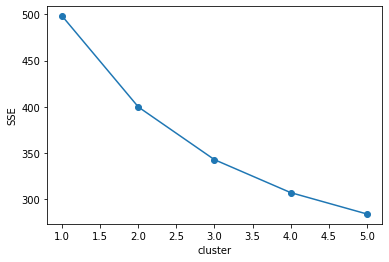

In [105]:
def elbow(X):
    sse = []

    for i in range(1,6):
        model = KMeans(n_clusters=i, random_state=0, algorithm='auto')
        model.fit_predict(X)
        sse.append(model.inertia_)

    plt.plot(range(1, 6), sse, marker='o')
    plt.xlabel('cluster')
    plt.ylabel('SSE')
    plt.show()

    
elbow(cv_data)

In [106]:
from sklearn.metrics import silhouette_score

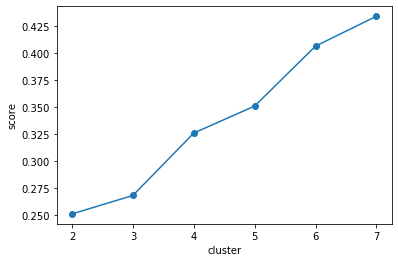

In [107]:
def silhouette(X):
    score = []

    for i in range(2,8):
        model = KMeans(n_clusters=i, random_state=0, algorithm='auto')
        model.fit_predict(X)
        score.append(silhouette_score(X, model.labels_))

    plt.plot(range(2,8), score, marker='o')
    plt.xlabel('cluster')
    plt.ylabel('score')
    plt.show()

    
silhouette(cv_data)
#silhouette score : 0.5보다 크면 클러스터링 잘 된 거라고 평가한다고 함

In [108]:
model = KMeans(n_clusters=4, random_state=0, algorithm='auto')

In [109]:
predict=model.fit_predict(cv_data)

In [110]:
names = zigzag['쇼핑몰'].array
word_centroid_map = {names[i]: predict[i] for i in range(len(names))}

In [111]:
for cluster in range(0,4):
    
    print("\nCluster {}".format(cluster))
    
    words = []
    for i in range(0,len(list(word_centroid_map.values()))):
        if( list(word_centroid_map.values())[i] == cluster ):
            words.append(list(word_centroid_map.keys())[i])
    print(words)


Cluster 0
['핫핑 ', '아뜨랑스', '슬로우앤드', '공구우먼', '라이크유', '메리어라운드', '임블리', '시크릿라벨', '데일리쥬', '언더비', '트렌디어패럴', '하나언니', '메이블루', '러브패리스', '쇼퍼랜드', '업타운홀릭', '블랙업', '스토리나인', '미뉴에트', '원로그', '립합', '리틀블랙', '가내스라', '세컨드세컨', '제이엘프', '렌느', '다크빅토리', '리얼코코', '미니뽕', '프로스트제이', '프롬걸즈', '로미스토리', '저스트원', '베리유', '퍼빗', '디프니', '핑크시슬리', '악녀일기', '완스몰', '울트라패션', '윙스몰', '블루팝스', '몸빼', '메이드제이', '시크폭스', '피핀', '로니엘', '인더클로젯', '파인땡큐', '하이쭈', '라라봉', '하비언니', '선데이업', '어반로지', '에이와비', '에이인', '데얼쉬이즈', '로즐리', '쓰리컷', '하우스제이', '크렘므', '데이디데이', '르네이', '블라', '마이바니', '리브어리', '러브썸원', '비숍', '큐니걸스', '조아맘', '달리호텔', '모노데일리']

Cluster 1
['육육걸즈 ', '플라이모델', '다바걸', '갠소', '라룸', '히프나틱', '바온', '패션풀', '안나키즈', '딘트', '프롬헤드투토', '두쏘', '헤이즐모드', '기프티박스', '에브리모닝', '더베를린', '에프터먼데이', '츄', '11am', '비바루비', '그레이시크', '페미니크', '헤이부', '스프링콤마', '매그제이', '밀크코코아', '크러시제이', '제이스타일', '러브앤드팝', '믹스엑스믹스', '빛다', '럽인업', '체리빌레', '오드', '구룸', '리치무드', '로로텐', '인더모드', '무드인슬로우', '논코드', '코튼로그', '바이너리원', '파스텔타임', '미미앤디디', '리비노']

Cluster 2
['고고싱', '리리앤코', '앙투', '98도씨', '베니토', '민스샵', 

In [112]:
cluster_series=pd.Series(predict)

In [113]:
shopping_unique

,쇼핑몰,태그
0,11am,"[러블리, 페미닌, 11am]"
1,98도씨,"[심플베이직, 캠퍼스룩, 98도씨]"
2,가내스라,"[심플베이직, 모던시크, 가내스라]"
3,갠소,"[러블리, 심플베이직, 갠소]"
4,걸스코코,"[심플베이직, 유니크, 걸스코코]"
...,...,...
362,화이트제이,"[러블리, 섹시글램, 화이트제이]"
363,휴지마켓,"[러블리, 심플베이직, 휴지마켓]"
364,히니크,"[러블리, 섹시글램, 히니크]"
365,히프나틱,"[러블리, 섹시글램, 히프나틱]"


In [114]:
pd.concat([shopping_unique, cluster_series], axis=1)

,쇼핑몰,태그,0
0,11am,"[러블리, 페미닌, 11am]",1
1,98도씨,"[심플베이직, 캠퍼스룩, 98도씨]",0
2,가내스라,"[심플베이직, 모던시크, 가내스라]",0
3,갠소,"[러블리, 심플베이직, 갠소]",2
4,걸스코코,"[심플베이직, 유니크, 걸스코코]",0
...,...,...,...
362,화이트제이,"[러블리, 섹시글램, 화이트제이]",1
363,휴지마켓,"[러블리, 심플베이직, 휴지마켓]",2
364,히니크,"[러블리, 섹시글램, 히니크]",1
365,히프나틱,"[러블리, 섹시글램, 히프나틱]",1


# 해시태그 간 유사도

In [115]:
shopping_data

,쇼핑몰,태그
0,육육걸즈,심플베이직
0,육육걸즈,러블리
1,핫핑,심플베이직
1,핫핑,러블리
2,아뜨랑스,캠퍼스룩
...,...,...
393,라라런드리,캐주얼
394,더핑크,심플베이직
394,더핑크,러블리
395,다닝,페미닌


In [116]:
df_tag = shopping_data.groupby('태그').agg(list)
df_tag = df_tag.reset_index()


In [124]:
df_tag

,태그,쇼핑몰
0,러블리,"[육육걸즈 , 핫핑 , 고고싱, 프롬비기닝, 리리앤코, 앙투, 메이빈스, 민스샵, ..."
1,럭셔리,"[리틀블랙, 비바루비, 오드, 비숍, 주줌]"
2,로맨틱,"[로미스토리, 에브리모닝, 츄, 시크라인, 코코블랙, 미나그램, 세즈윅, 체리빌레,..."
3,모던미니멀,"[엔도르시, 인디우드, 팔구엠, 리밋비, 바이린, 머니모니]"
4,모던시크,"[메이비베이비, 라이크유, 플라이모델, 위드윤, 데일리쥬, 커먼유니크, 트렌디어패럴..."
5,미시스타일,"[메이블루, 스토리나인, 안나키즈, 홀릭홀릭, 몸빼, 리지랄닷컴, 하우스제이, 주줌..."
6,베이직,"[풀문, 아토, 꼬맹, 바이브라운, 바이너리원, 키키러브, 위드썸, 시크릿라벨]"
7,빅사이즈,"[공구우먼, 라일론, 마리앙플러스, 블루팝스, 쏘머치, 리치무드, 로로텐]"
8,빈티지,"[바온, 빈블, 인더클로젯, 러브앤드팝, 그레이핑크, 러브앤드팝, 참견]"
9,섹시글램,"[립합, 히프나틱, 히니크, 프롬데이원, 코발트빈, 스위트글램, 마이바니, 룩걸, ..."


In [117]:
shop_list = []
for line in df_tag['쇼핑몰']:
    shop_list.append(','.join(line))  

In [118]:
tfidf = TfidfVectorizer()
tfidf_tag = tfidf.fit_transform(shop_list)
print(tfidf_tag.shape)

(22, 366)


In [119]:
cosine_sim_tag = linear_kernel(tfidf_tag, tfidf_tag)

In [120]:
tag_indices = pd.Series(df_tag.index, index=df_tag['태그'])

In [121]:
tag_indices

태그
러블리        0
럭셔리        1
로맨틱        2
모던미니멀      3
모던시크       4
미시스타일      5
베이직        6
빅사이즈       7
빈티지        8
섹시글램       9
스쿨룩       10
스트릿       11
시크        12
심플        13
심플베이직     14
심플캐주얼     15
오피스룩      16
유니크       17
캐주얼       18
캠퍼스룩      19
페미닌       20
헐리웃스타일    21
dtype: int64

In [127]:
def get_hashtags(hashtag, cosine_sim=cosine_sim):
    
    idx = tag_indices[hashtag]

    # 모든 해시태그에 대해서 해당 해시태그와의 유사도를 구하기
    sim_scores = list(enumerate(cosine_sim_tag[idx]))
    #유사도에 따른 정렬
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    number =[]
    score=[]
    for item in sim_scores:
        index, scr = item
        score.append(scr)
        number.append(index)

            
    result = pd.DataFrame({'태그': df_tag['태그'].iloc[number], 'score':score})
    
    return result

In [129]:
get_hashtags('러블리')

,태그,score
0,러블리,1.000000
14,심플베이직,0.516412
9,섹시글램,0.282826
20,페미닌,0.169151
18,캐주얼,0.125723
19,캠퍼스룩,0.100649
15,심플캐주얼,0.075671
2,로맨틱,0.068379
16,오피스룩,0.051422
7,빅사이즈,0.049491
